In [2]:
# %matplotlib qt
import pickle
import os
from pylab import *

In [3]:
def store(data, name):
    with open('./map_windows/'+name+'.p','wb') as f:
        pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

def loadFile(name):
    with open(name,"rb") as f:
        return pickle.load(f)

In [4]:
G = loadFile('../map_data_processed/edges_list.p')
nodexy = loadFile('../map_data_processed/node_xy.p')
nodell = loadFile('../map_data_processed/node_ll.p')

In [5]:
Xs = []; Ys = []
for k in nodexy:
    Xs.append(nodexy[k][0])
    Ys.append(nodexy[k][1])

In [6]:
range_x = int(max(Xs)-min(Xs))+10
range_y = int(max(Ys)-min(Ys))+10
print('length of x axis :',range_x)
print('length of y axis :',range_y)
x_offset = int(min(Xs))-10
y_offset = int(min(Ys))-10
print('x_offset = ',x_offset)
print('y_offset = ',y_offset)

length of x axis : 50352
length of y axis : 20134
x_offset =  1310877
y_offset =  6057984


*

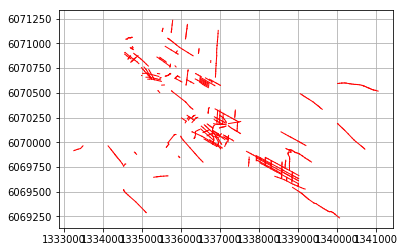

In [7]:
j = 0
for edge in G[2000:3000]:
    if(j % 10000 == 0):
        print('*',end='')
    x1,y1 = nodexy[edge[0]]
    x2,y2 = nodexy[edge[1]]
    plot([x1,x2],[y1,y2],'-r',linewidth=1)
    j += 1
grid()
show()

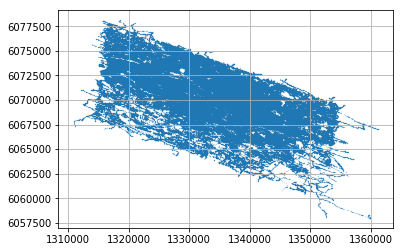

In [8]:
scatter(Xs,Ys,s=0.01)
grid()
show()

In [9]:
windows = {}
for edge in G:
    x,y = map(int,nodexy[edge[0]])
    x_grid = (x-x_offset)//200
    y_grid = (y-y_offset)//200
    code = str(x_grid)+'_'+str(y_grid)
    if(code not in windows):
        windows[code] = []
    windows[code].append(edge)

In [10]:
filelist = [ f for f in os.listdir('map_windows') ]
for f in filelist:
    os.remove(os.path.join('map_windows', f))

In [11]:
for code in windows:
    store(windows[code],'w_'+code)